# Data Preprocessing of Ground Truth

Import statments. Ensure that the package 'endolas' that is shipped with this notebook can be imported. 

In [1]:
import imageio
import numpy as np
import json
import os
import random

from matplotlib import pyplot as plt
from skimage.transform import warp
from skimage.morphology import flood
from skimage.filters import gaussian
from glob import glob
from shutil import copyfile

from endolas import utils

# Functionality
This functionality block contains functionality needed to create the data sets.

In [2]:
def create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back):
    """ Extract all frames from .avi and keypoints from .rois.
        Store single images, masks, moving images and keypoints.
    """
    
    image_index_2_roi_2_xy = dict()
    for video in sources:
        video_path = os.path.join(base_dir, "{}.avi".format(video))
        rois_path = os.path.join(base_dir, "{}.rois".format(video))

        reader = imageio.get_reader(video_path)

        file = open(rois_path)
        roi_data = json.load(file)

        for frame, image in enumerate(reader):  
            # Extract image
            save_path = os.path.join(save_dir, "{}.png".format(image_index))
            plt.imsave(save_path, image, cmap="gray")

            rois = roi_data["frames"][frame]["roi_positions"]
            roi_2_xy = dict()

            # Create mask
            mask = np.zeros(image.shape)
            for roi in rois:
                if not roi['placed']:
                    continue

                id = roi['id']
                x = roi['pos']['x']
                y = roi['pos']['y']

                x = int(round(roi['pos']['x'], 0))
                y = int(round(roi['pos']['y'], 0))

                roi_2_xy[id] = (x, y)
                mask[y][x] =  255

            mask = gaussian(mask,sigma=0.9)
            mask = (mask / mask.max()) * 255
            mask = np.where(mask>0.1, 1.0, 0.0)

            plt.imshow(mask, cmap="gray")
            mask_path = os.path.join(save_dir, "{}_m.png".format(image_index))
            plt.imsave(mask_path, mask, cmap="gray")
            
            # Create keypoints .json
            json_path = os.path.join(save_dir, "{}.json".format(image_index))
            json_file = json.dumps(roi_2_xy)

            f = open(json_path, "w")
            f.write(json_file)
            f.close() 
            file.close()
            
            # Create moving image
            moving = np.zeros((height, width))
            for key, value in roi_2_xy.items():
                moving[value[1]][value[0]] = 1
            moving = utils.apply_smoothing(moving, sigma=2, sigma_back=15)
            save_path = save_dir + os.sep + "{}_mov.png".format(image_index)
            plt.imsave(save_path, moving, cmap='gray')

            image_index += 1

# Parameters
Parameters used for the specific data set

In [3]:
height = 768
width = 768
sigma = 2
sigma_back= 15

# Fold 1

<ipython-input-2-0495753c07ee>:40: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  mask = gaussian(mask,sigma=0.9)


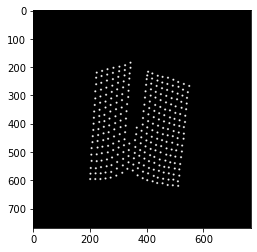

In [4]:
image_index = 0
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/fold_1"
sources = ["KK2_gap0_Cam_16904_Cine2_0_19",
           "KK4_gap0_Cam_16904_Cine2_0_19"]

create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back)

# Fold 2

<ipython-input-2-0495753c07ee>:40: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  mask = gaussian(mask,sigma=0.9)


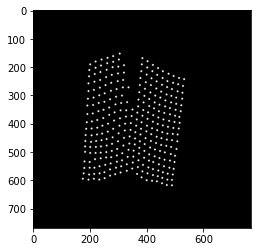

In [5]:
image_index = 40
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/fold_2"
sources = ["KK11_gap0_Cam_16904_Cine3_0_19",
           "KK16_gap0_Cam_16904_Cine2_0_19"]

create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back)

# Fold 3

<ipython-input-2-0495753c07ee>:40: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  mask = gaussian(mask,sigma=0.9)


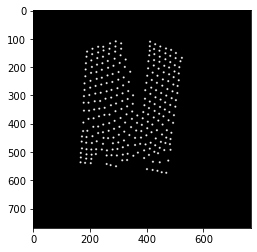

In [6]:
image_index = 80
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/fold_3"
sources = ["KK17_gap0_Cam_16904_Cine2_0_19",
           "KK18_gap0_Cam_16904_Cine2_0_19"]

create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back)

# Fold 4

<ipython-input-2-0495753c07ee>:40: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  mask = gaussian(mask,sigma=0.9)


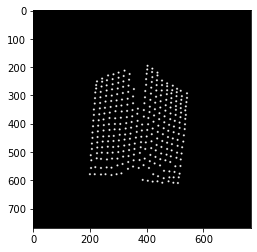

In [7]:
image_index = 120
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/fold_4"
sources = ["KK19_gap0_Cam_16904_Cine2_0_19",
           "KK24_gap0_Cam_16904_Cine2_0_19"]

create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back)

# Fold 5

<ipython-input-2-0495753c07ee>:40: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  mask = gaussian(mask,sigma=0.9)


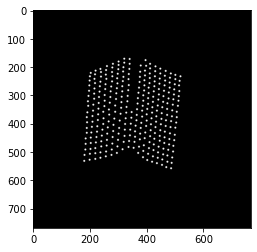

In [8]:
image_index = 160
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2AK/fold_5"
sources = ["KK3_gap0_Cam_16904_Cine2_0_19",
           "KK9_gap0_Cam_16904_Cine2_0_19"]

create_and_store(base_dir, save_dir, sources, image_index, height, width, sigma, sigma_back)